In [2]:
import pandas as pd
import numpy as np
import scipy.special as sc
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import math

In [3]:
#данные
x = np.linspace(1, 100)
n = 120
#закон Парето
density = 0.4 * (50 / x) ** 21

In [4]:
#функция распределения
dens = 1 - (50 / x) ** 20

In [5]:
#обратная функция
def inverse_function(y):
    return (50 / ((1 - y) ** (1 / 20)))

In [6]:
#случайный вектор
y = [random.random() for i in range(n)]
print([round(v,4) for v in y])

[0.3656, 0.2964, 0.8844, 0.1742, 0.9813, 0.1609, 0.9137, 0.4569, 0.9564, 0.2379, 0.7147, 0.4213, 0.4624, 0.5958, 0.644, 0.9384, 0.0814, 0.1594, 0.0022, 0.6899, 0.5893, 0.9867, 0.7826, 0.5281, 0.6227, 0.6695, 0.7353, 0.3689, 0.6504, 0.2889, 0.4771, 0.484, 0.4675, 0.1601, 0.3022, 0.6219, 0.1461, 0.8587, 0.3915, 0.5516, 0.2154, 0.2126, 0.8214, 0.476, 0.9543, 0.2276, 0.5187, 0.4166, 0.9464, 0.801, 0.5576, 0.4341, 0.5097, 0.1144, 0.6902, 0.2853, 0.3082, 0.82, 0.0899, 0.0142, 0.1284, 0.4353, 0.5618, 0.5808, 0.3946, 0.9068, 0.7369, 0.9889, 0.8495, 0.0137, 0.9144, 0.1146, 0.0692, 0.459, 0.7895, 0.9442, 0.167, 0.1397, 0.8522, 0.4493, 0.0317, 0.8691, 0.4724, 0.2595, 0.3973, 0.7114, 0.7351, 0.1267, 0.2356, 0.2967, 0.379, 0.9181, 0.5699, 0.6012, 0.6266, 0.1107, 0.9252, 0.3443, 0.1689, 0.7106, 0.4269, 0.6279, 0.5774, 0.8334, 0.516, 0.2377, 0.9385, 0.7265, 0.645, 0.2294, 0.0236, 0.7783, 0.9276, 0.6381, 0.75, 0.612, 0.4216, 0.258, 0.6464, 0.6632]


In [7]:
y_new = [inverse_function(i) for i in y]
print([round(v,4) for v in y_new])

[51.1508, 50.8866, 55.6962, 50.4808, 61.0069, 50.4406, 56.5153, 51.5496, 58.4793, 50.6839, 53.2359, 51.3864, 51.5759, 52.3165, 52.6496, 57.4761, 50.2126, 50.436, 50.0056, 53.0147, 52.2751, 62.0606, 53.9642, 51.9131, 52.4973, 52.8463, 53.4357, 51.1641, 52.6974, 50.8598, 51.6474, 51.6818, 51.6003, 50.4382, 50.9077, 52.4914, 50.3963, 55.1404, 51.2576, 52.046, 50.61, 50.6012, 54.4978, 51.6422, 58.3412, 50.6497, 51.8621, 51.3653, 57.8756, 54.2038, 52.081, 51.444, 51.8142, 50.3047, 53.017, 50.847, 50.9295, 54.4759, 50.236, 50.0357, 50.3447, 51.4493, 52.1057, 52.2214, 51.2705, 56.2975, 53.4516, 62.6319, 54.9668, 50.0344, 56.5396, 50.3051, 50.1796, 51.5597, 54.0518, 57.7607, 50.4588, 50.3777, 55.0151, 51.514, 50.0806, 55.3505, 51.6242, 50.7567, 51.2819, 53.205, 53.4335, 50.3399, 50.676, 50.8878, 51.2052, 56.6649, 52.1546, 52.3521, 52.5247, 50.2941, 56.9231, 51.0665, 50.4646, 53.1978, 51.4114, 52.5339, 52.2005, 54.6867, 51.8472, 50.6833, 57.4796, 53.3483, 52.6572, 50.6556, 50.0597, 53.9112, 57.

In [8]:
a = np.array(y_new, float)

In [9]:
#крайние члены вариационного ряда
min_a = min(a)
max_a = max(a)
print(min_a, max_a)

50.00557288769595 62.631903827771055


In [10]:
#кол-во интервалов
intervals = math.trunc(1 + 3.32*math.log(n, 10))
print(intervals)

7


In [11]:
#длина интервалов
h = (max_a - min_a) / intervals
print(h)

1.8037615628678725


In [12]:
#массив частот
hist = np.histogram(a, intervals)
print(hist[0])

[58 35 11  7  6  0  3]


In [13]:
hist_center = [0] * intervals
for i in range (0, intervals):
    hist_center[i] = hist[1][i] + h / 2
    print("%-7.3f %3d" % (hist[1][i] + h / 2, hist[0][i]))

50.907   58
52.711   35
54.515   11
56.319    7
58.122    6
59.926    0
61.730    3


In [14]:
#относительные частоты
rel_frequency = [0] * intervals
for i in range (0, intervals):
    rel_frequency[i] = hist[0][i] / len(a)
    print(rel_frequency[i])

0.48333333333333334
0.2916666666666667
0.09166666666666666
0.058333333333333334
0.05
0.0
0.025


In [15]:
#высота столбцов диаграммы
hist_hight = [0] * intervals
for i in range (0, intervals): 
    hist_hight[i] = rel_frequency[i] / h
    print("%5.5f" % (hist_hight[i]))

0.26796
0.16170
0.05082
0.03234
0.02772
0.00000
0.01386


In [16]:
#границы интервалов
borders = [0] * intervals
for i in range (0, intervals): 
    borders[i] = hist[1][i]
    print("%5.5f" % (borders[i]))

50.00557
51.80933
53.61310
55.41686
57.22062
59.02438
60.82814


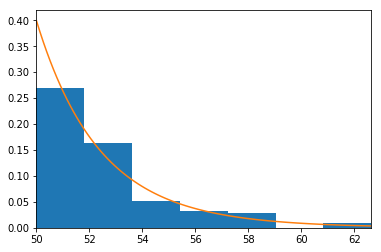

In [17]:
#гистограмма и график теоретической плотности распределения
plt.hist(a, 
         bins = np.arange(min_a, max_a + 1, h),
         density = True, 
         range = (min_a, max_a))
plt.xlim(min_a, max_a)
x_graph = np.linspace (min_a, max_a, 100) 
plt.plot(x_graph, 0.4 * (50 / x_graph) ** 21)

In [461]:
#Теоретические характеристики
m_teor = 50 * (21 / 20)
d_teor = ((50 / 20) ** 2) * (21 / 19)
print(m_teor, d_teor)

52.5 6.907894736842106


In [462]:
#Эмпирические характеристики
m_emp = np.mean(a)
d_emp = np.var(a)
print(m_emp, d_emp)

52.463323459801295 7.4544959179149775


In [463]:
#Отклонение
diff_m = abs(m_teor - m_emp)
diff_d = d_teor / d_emp
print(diff_m, diff_d)

0.036676540198705254 0.9266749640630623


In [464]:
#Теоретическая функция распределения
def function_teor(x):
    if (x >= 50):
        return (1 - (50 / x) ** 20)
    else: return 0

In [465]:
#Эмпирическая функция распределения
def function_emp(z):
    ans = 0
    for i in range(n):
        ans += ind(z-a[i]) / n
    return ans

In [472]:
#Доверительный интервал
gamma = 0.1
epsilon = (- 1 / (2 * n) * math.log(gamma / 2)) ** (1 / 2)
print(epsilon)

0.1117238461854718


In [473]:
def r(x):
    e = function_emp(x)
    if (e + epsilon < 1): return e + epsilon
    else: return 1

In [474]:
def l(x):
    e = function_emp(x)
    if (e - epsilon > 0): return e - epsilon
    else: return 0

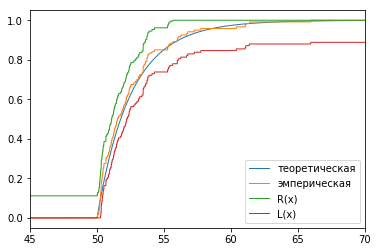

In [489]:
x_param = np.linspace(45, 70, 100000)
y_param_t = np.vectorize(function_teor, otypes=[float])
plt.plot(x_param, y_param_t(x_param), linewidth = 1, label = 'теоретическая')
y_param_e = np.vectorize(function_emp, otypes=[float])
plt.plot(x_param, y_param_e(x_param), linewidth = 1, label = 'эмперическая')
y_param_r = np.vectorize(r, otypes=[float])
y_param_l = np.vectorize(l, otypes=[float])
plt.plot(x_param, y_param_r(x_param), linewidth = 1, label = 'R(x)')
plt.plot(x_param, y_param_l(x_param), linewidth = 1, label = 'L(x)')
plt.xlim(45, 70)
plt.legend()